# Programming Exercise 2: Logistic Regression

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Defining necessary functions:

In [2]:
def plotData(X, y):
    print('Plotting data with x indicating (y = 1) examples and o indicating (y = 0) examples.\n')
    
    fig = plt.figure()
    
    pos = np.where(y == 1)
    neg = np.where(y == 0)

    plt.scatter(X[pos, 0], X[pos, 1], c="r",marker="+")
    plt.scatter(X[neg, 0], X[neg, 1], marker="o",s=10)

In [3]:
def sigmoid(z):
    #g = SIGMOID(z) computes the sigmoid of z.
    
    #Computation
    g = np.zeros(np.shape(z))
    g = 1/(1+np.exp(-z))
    
    return g

In [4]:
def costFunction(theta, X, y):
    #J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the parameter for logistic regression and the gradient of the cost w.r.t. to the parameters.
    
    #Initialize some useful values
    m = len(y)
    J = 0
    
    #Calculate hypothesis h
    h = sigmoid(np.dot(X,theta))
    
    #Calculate cost function J
    #J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))
    J = np.sum(np.dot((-y.T),np.log(h))-np.dot((1-y).T,np.log(1-h)))/m
    
    #Calculate gradient
    error = h-y
    grad = np.dot(error, X) / y.size
    #grad = np.dot((h-y).T, X).T/m
    
    return J, grad.ravel()

In [5]:
def costFunctionReg(theta, X, y, lambda_):
    #COSTFUNCTIONREG Compute cost and gradient for logistic regression with regularization
    
    #Initialze some useful values
    m = len(y) #Number of training examples
    J = 0
    
    #theta = theta[:,np.newaxis] 
    grad = np.zeros(theta.shape)
    
    #Calculate hypothesis h
    h = sigmoid(np.dot(X,theta))
    
    #Rearrange theta
    temp = theta
    temp[0] = 0
    
    #Calculate cost J with regularizer lambda
    J = np.sum(np.dot((-y.T),np.log(h))-np.dot((1-y).T,np.log(1-h)))/m + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    #Calculate gradient
    #grad = 1/m * np.dot(X.transpose(),(h - y))
    #grad = grad + (lambda_ / m) * temp
    #grad = np.sum(np.dot((h-y).T, X))/m + (lambda_/m)*temp
    error = h - y
    grad = (np.dot(X.T, error) + lambda_*temp)/m 
    
    return J, grad.ravel()

In [6]:
def plotDecisionBoundary(theta, X, y):
    #PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the positive examples and o for the negative examples.
    
    #Plot data
    plotData(X[:,1:], y)
    
    if(X[:,1:].size/len(y) <= 3):
        #Only need 2 points to define a line, so choose two endpoints
        plot_x = [min(X[:,1])-2,  max(X[:,1])+2]
        
        #Calcuate the decision boundary line
        plot_y = np.multiply(-1/theta[2], np.multiply(theta[1], plot_x) + theta[0])
        
        #Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y, linewidth = 0.45, label = 'Decision Boundary')
        
    else:
        #Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((len(u), len(v)))
        #Evaluate z = X*theta over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = mapFeature(u[i], v[j])@theta;
                #np.dot(mapFeature(u[i],v[j]), theta) 
        
        z = z.T #important to transpose z before calling contour
        
        #Plot z = 0
        #Notice you need to specify the range [0, 0]
        #Contour Plot
        plt.contour(u,v,z,0)

In [7]:
def mapFeature(X1, X2):
    #MAPFEATURE Feature mapping function to polynomial features
    
    #MAPFEATURE(X1, X2) maps the two input features to quadratic features used in the regularization exercise.
    
    #Returns a new feature array with more features, comprising of X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    
    #Inputs X1, X2 must be the same size
    #X1.shape = (X1.size, 1)
    #X2.shape = (X2.size, 1)
    degree = 6
    out = np.ones(np.size(X1)).reshape(np.size(X1),1)
    
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (X1**(i-j) * X2**j).reshape(np.size(X1),1)
            out= np.hstack((out,terms))
    return out   

In [8]:
def predict(theta, X):
    #PREDICT Predict whether the label is 0 or 1 using learned logistic regression parameters theta
    
    #p = PREDICT(theta, X) computes the predictions for X using a threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    m = len(X) #number of training examples
    
    p = np.zeros((m, 1))
    
    h=sigmoid(np.dot(X,theta))
    
    p = h>=0.5
    
    return p

### 1. Logistic Regression

<p>In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.</p>

<p>Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.</p>

<p>Your task is to build a classiﬁcation model that estimates an applicant’s probability of admission based the scores from those two exams.</p>

In [9]:
data = pd.read_csv('ex2data1.txt', sep=",", header=None)
data.columns = ['Exam1', 'Exam2', 'AdmitorNot']
data.head()

,Exam1,Exam2,AdmitorNot
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [10]:
X = data.values[:, 0:2] 
y = data.values[:, 2]

### 1.1 Visualizing Data

<p>Before starting to implement any learning algorithm, it is always good to visualize the data if possible. In the ﬁrst part of ex2.m, the code will load the data and display it on a 2-dimensional plot by calling the function plotData.</p>

<p>You will now complete the code in plotData so that it displays a ﬁgure like Figure 1, where the axes are the two exam scores, and the positive and negative examples are shown with diﬀerent markers.</p>

Plotting data with x indicating (y = 1) examples and o indicating (y = 0) examples.



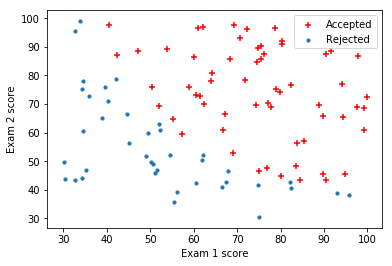

Points with x represents Admitted and points with o represents Not Admitted


In [11]:
plotData(X, y)
# add axes labels
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(["Accepted","Rejected"],loc=0)
plt.show()
print('Points with x represents Admitted and points with o represents Not Admitted')

### 1.2 Implementation

### 1.2.1 Sigmoid function

<p>Before you start with the actual cost function, recall that the logistic regression hypothesis is deﬁned as:
hθ(x) = g(θTx),
where function g is the sigmoid function. The sigmoid function is deﬁned as:
g(z) =
1 / (1 + e^−z)
</p>

<p>Your ﬁrst step is to implement this function in sigmoid() so it can be called by the rest of your program. When you are ﬁnished, try testing a few values by calling sigmoid(x). For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5. Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element.</p>

In [12]:
print('Sigmoid(x) for large positive values (x=10):', sigmoid(10))
print('\nSigmoid(x) for large negative values (x=-10):', sigmoid(-10))
print('\nSigmoid(x) when x = 0:', sigmoid(0))

Sigmoid(x) for large positive values (x=10): 0.9999546021312976

Sigmoid(x) for large negative values (x=-10): 4.5397868702434395e-05

Sigmoid(x) when x = 0: 0.5


### 1.2.2 Cost function and Gradient

<p>Now you will implement the cost function and gradient for logistic regression. Complete the code in costFunction.m to return the cost and gradient.</p>
<p>Recall that the cost function in logistic regression is
$$J(θ) = \frac{1}{m} \sum_{i=1}^m [y^ilog(h_\theta(x^i)) - (1-y^i)log(1-h_\theta(x^i))]$$, 
<br>and the gradient of the cost is a vector of the same length as θ where the $j^{th}$ element (for j = 0,1,...,n) is deﬁned as follows:
$$\frac{\partial J(θ)}{\partial θ_j} = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^i))-y^i)x^i_j$$
</p>

<p>Note that while this gradient looks identical to the linear regression gradient, the formula is actually diﬀerent because linear and logistic regression have diﬀerent deﬁnitions of $h_θ(x)$.</p>

<p>Call your costFunction using the initial parameters of θ. You should see that the cost is about 0.693.</p>

In [13]:
m, n = X.shape

#Add intercept term to X
x0 = np.ones((m,1))
X = np.append(x0, X, axis = 1)

#Initialize fitting parameters
initial_theta = np.zeros((n+1,1))

#Compute and display initial cost and gradient
cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):', grad)
print('Expected gradients (approx): [-0.1000  -12.0092  -11.2628]')

Cost at initial theta (zeros): 0.6931471805599452
Expected cost (approx): 0.693
Gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221  -0.1        -12.00921659
 -11.26284221  -0.1        -12.00921659 -11.26284221  -0.1
 -12.00921659 -11.26284221  -0.1        -12.00921659 -11.26284221
  -0.1        -12.00921659 -11.26284221  -0.1        -12.00921659
 -11.26284221  -0.1        -12.00921659 -11.26284221  -0.1
 -12.00921659 -11.26284221  -0.1        -12.00921659 -11.26284221
  -0.1        -12.00921659 -11.26284221  -0.1        -12.00921659
 -11.26284221  -0.1        -12.00921659 -11.26284221  -0.1
 -12.00921659 -11.26284221  -0.1        -12.00921659 -11.26284221
  -0.1        -12.00921659 -11.26284221  -0.1        -12.00921659
 -11.26284221  -0.1        -12.00921659 -11.26284221  -0.1
 -12.00921659 -11.26284221  -0.1        -12.00921659 -11.26284221
  -0.1        -12.00921659 -11.26284221  -0.1        -12.00921659
 -11.26284221  -0.1        -12.00921659 -11.26284221  -

In [14]:
test_theta = [-24, 0.2, 0.2]
[cost, grad] = costFunction(test_theta, X, y)

print('\nCost at test theta: \n', cost)
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta: \n',grad);
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')


Cost at test theta: 
 0.21833019382659796
Expected cost (approx): 0.218

Gradient at test theta: 
 [0.04290299 2.56623412 2.64679737]
Expected gradients (approx):
 0.043
 2.566
 2.647



### 1.2.3 Learning parameters using Optimize (Scipy):

<p>Note that we don't actually perform gradient descent in this function - we just compute a single gradient step. In the exercise, an Octave function called "fminunc" is used to optimize the parameters given functions to compute the cost and the gradients. Since we're using Python, we can use SciPy's optimization API to do the same thing.</p>

<p>To specify the actual function we are minimizing, we use an optimization function from Scipy package <b>fmin_tnc()</b>with argument func that calls your costFunction. This allows us to wrap the costFunction for use with fmin_tnc.</p>

<p>If you have completed the costFunction correctly, fmin_tnc will converge on the right optimization parameters and return the ﬁnal values of the cost and θ. Notice that by using fmin_tnc, you did not have to write any loops yourself, or set a learning rate like you did for gradient descent. This is all done by fmin_tnc: you only needed to provide a function calculating the cost and the gradient, initial theta values and data arguments.</p>

<p>Once fmin_tnc completes, you will call your costFunction function using the optimal parameters of θ. You should see that the cost is about 0.218.</p>

<p>This ﬁnal θ value will then be used to plot the decision boundary on the training data, resulting in a ﬁgure similar to Figure 2. We also encourage you to look at the code in plotDecisionBoundary() to see how to plot such a boundary using the θ values.</p>

In [15]:
import scipy.optimize as opt


# set options for optimize.minimize
options= {'maxiter': 400}

res = opt.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

#result = opt.fmin_tnc(func=costFunction, x0=initial_theta, args=(X, y))

In [16]:
print('Thetas found by minimize function: ', res);
print('Cost at theta found : \n', cost);
print('Expected cost (approx): 0.203\n');
print('theta: \n',theta);
print('Expected theta (approx):\n');
print(' -25.161\n 0.206\n 0.201\n');

Thetas found by minimize function:       fun: 0.20349770158947497
     jac: array([9.14875519e-09, 9.99037356e-08, 4.79345707e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131853,   0.20623159,   0.20147149])
Cost at theta found : 
 0.20349770158947497
Expected cost (approx): 0.203

theta: 
 [-25.16131853   0.20623159   0.20147149]
Expected theta (approx):

 -25.161
 0.206
 0.201



Plotting data with x indicating (y = 1) examples and o indicating (y = 0) examples.



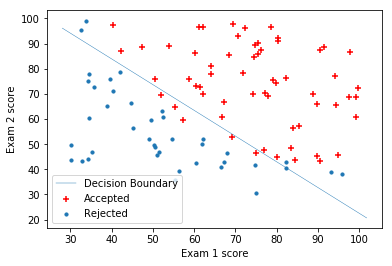

In [17]:
#Plot Boundary
plotDecisionBoundary(theta, X, y)
# add axes labels
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(["Decision Boundary", "Accepted","Rejected"],loc=0)
plt.show()

### 1.2.4 Evaluating Logistic Regression:

<p>After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776.</p>

<p>Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. In this part, your task is to complete the code in predict(). The predict function will produce “1” or “0” predictions given a dataset and a learned parameter vector θ.</p>

<p>After you have completed the code in predict(), the script will proceed to report the training accuracy of your classiﬁer by computing the percentage of examples it got correct.</p>

In [18]:
X_test = np.array([1, 45, 85])
prob = sigmoid(np.dot(X_test, theta))
print('For a student with scores 45 and 85, we predict an admission probability of ', prob)
print('Expected value: 0.775 +/- 0.002')

For a student with scores 45 and 85, we predict an admission probability of  0.7762906220893772
Expected value: 0.775 +/- 0.002


In [19]:
#Compute accuracy on training set
p = predict(theta, X)

print('Train Accuracy:', np.mean(p == y) * 100)
print('Expected accuracy (approx): 89.0\n')

Train Accuracy: 89.0
Expected accuracy (approx): 89.0



### 2. Regularized Logistic Regression

<p>In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.</p>

<p>Suppose you are the product manager of the factory and you have the test results for some microchips on two diﬀerent tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.</p>

In [20]:
data = pd.read_csv('ex2data2.txt', sep = ',', header = None)
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [21]:
X = data.values[:,:2]
y = data.values[:,2:3]

### 2.1 Visualize data

<p>Similar to the previous parts of this exercise, plotData is used to generate a ﬁgure like Figure 3, where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with diﬀerent markers.</p>

Plotting data with x indicating (y = 1) examples and o indicating (y = 0) examples.



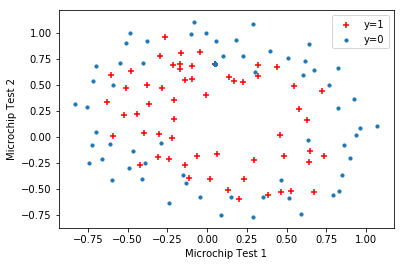

In [22]:
plotData(X, y)

#Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(["y=1", "y=0"],loc=0)
plt.show()

<p>The above figure shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straightforward application of logistic regression will not perform well on this dataset since logistic regression will only be able to ﬁnd a linear decision boundary.</p>

### 2.2 Feature Mapping

<p>One way to ﬁt the data better is to create more features from each data point. In the provided function mapFeature(), we will map the features into all polynomial terms of x1 and x2 up to the sixth power.</p>

In [23]:
#Add Polynomial Features
#Note that the mapFeature() also adds a column of ones for us, so the intercept term is handled
X = mapFeature(X[:,0], X[:,1])
X.shape

(118, 28)

<p>As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classiﬁer trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.</p>

<p>While the feature mapping allows us to build a more expressive classiﬁer, it also more susceptible to overﬁtting. In the next parts of the exercise, you will implement regularized logistic regression to ﬁt the data and also see for yourself how regularization can help combat the overﬁtting problem.</p>

### 2.3 Cost Function and Gradient

<p>Now you will implement code to compute the cost function and gradient for regularized logistic regression. Complete the code in costFunctionReg.m to return the cost and gradient. Recall that the regularized cost function in logistic regression is
$$J(θ) = \frac{1}{m} \sum_{i=1}^m [y^ilog(h_\theta(x^i)) - (1-y^i)log(1-h_\theta(x^i))] + \frac{\lambda}{2m} \sum_{j=1}^n \theta^2_j$$ </p>

<p>Note that you should not regularize the parameter $\theta_0$.  The gradient of the cost function is a vector where the jth element is deﬁned as follows:
$$\frac{\partial J(θ)}{\partial θ_j} = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^i))-y^i)x^i_j$$ for j = 0
$$\frac{\partial J(θ)}{\partial θ_j} = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^i))-y^i)x^i_j + \frac{\lambda}{m} \theta_j$$ for j = 1
    </p>
    
<p>call your costFunctionReg function using the initial value of θ (initialized to all zeros). You should see that the cost is about 0.693.</p>

In [24]:
#Initial fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

#Set regularization parameter lambda to 1
lambda_ = 1

#Compute and display initial cost and gradient for regularized logistic regression
cost, grad = costFunctionReg(initial_theta, X, y, lambda_)

print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - first five values only:', grad[0:5])
print('Expected gradients (approx) - first five values only:')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115')

Cost at initial theta (zeros): 0.6931471805599453
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only: [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]
Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


In [25]:
#Compute and display cost and gradient with all ones theta and lambda = 10
test_theta = np.ones((X.shape[1], 1))
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('Cost at test theta (with lambda = 10):', cost)
print('Expected cost (approx): 3.16')
print('Gradient at test theta - first five values only:', grad[0:5])
print('Expected gradients (approx) - first five values only:\n')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')

Cost at test theta (with lambda = 10): 3.16450933161501
Expected cost (approx): 3.16
Gradient at test theta - first five values only: [0.34604507 0.16135192 0.19479576 0.22686278 0.09218568]
Expected gradients (approx) - first five values only:

 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



### 2.3.1 Learning parameters using optimize

In [33]:
#Initial fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

#Set regularization parameter lambda to 1
lambda_ = 1

# set options for optimize.minimize
options= {'maxiter': 400}

res = opt.minimize(costFunctionReg,
                        initial_theta.flatten(),
                        (X, y.flatten(), lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

In [34]:
print('Thetas found by minimize function: ', res)
print('Cost at theta found : \n', cost)
print('theta: \n',theta)

Thetas found by minimize function:       fun: 0.6544877959700425
     jac: array([-0.0610793 , -0.00660941, -0.00197446,  0.0161882 ,  0.00979726,
        0.0128444 , -0.0005022 ,  0.0054556 ,  0.00242436,  0.01208232,
        0.01564769,  0.00151902,  0.00649892,  0.00246737,  0.01993687,
        0.00383713,  0.00300201,  0.00068503,  0.00398526,  0.00197021,
        0.0166488 ,  0.01244347,  0.00043927,  0.00327991,  0.00018196,
        0.0041647 ,  0.000884  ,  0.02080876])
 message: 'Linear search failed'
    nfev: 96
     nit: 1
  status: 4
 success: False
       x: array([ 0.        , -0.00602678,  0.39178171, -0.45600963, -0.16345792,
       -0.14868216, -0.08286216, -0.05165687, -0.07950305, -0.03803835,
       -0.3995904 , -0.02030656, -0.1246764 , -0.04280453, -0.27166958,
       -0.14715524, -0.04113253, -0.02632121, -0.05234921, -0.05335967,
       -0.18084988, -0.3162826 , -0.00485563, -0.06747121, -0.00138271,
       -0.07169554, -0.01909383, -0.29410678])
Cost at theta f

### 2.4 Plotting Decision Boundary

<p>To help you visualize the model learned by this classiﬁer, we have provided the function plotDecisionBoundary() which plots the (non-linear) decision boundary that separates the positive and negative examples. In plotDecisionBoundary(), we plot the non-linear decision boundary by computing the classiﬁer’s predictions on an evenly spaced grid and then and drew a contour plot of where the predictions change from y = 0 to y = 1.</p>

<p>After learning the parameters θ, the next step will plot a decision boundary similar to Figure 4.</p>

Plotting data with x indicating (y = 1) examples and o indicating (y = 0) examples.



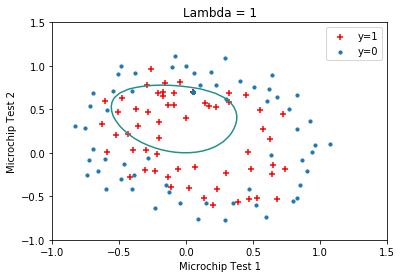

In [29]:
#Plot Boundary
plotDecisionBoundary(theta, X, y)
# add axes labels
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('Lambda = {}'.format(lambda_))
plt.legend(["y=1", "y=0"],loc=0)
plt.show()

In [31]:
#Compute accuracy on our training set
p = predict(theta, X);

print('Train Accuracy:', np.mean(p == y) * 100);
print('Expected accuracy (with lambda = 1): 83.1 (approx)');

Train Accuracy: 50.560183855214014
Expected accuracy (with lambda = 1): 83.1 (approx)
